In [35]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot

%matplotlib inline
sns.set_style("darkgrid")

In [36]:
df = pd.read_csv('survivor_clean.csv')
df.shape

(1159, 15)

In [38]:
# Target: whether they made it to merge 
y = df['merge']

# Features
X_prep = df.drop(['merge','castaway_id','version_season','castaway','jury_status','result','order'], axis = 1)
X = pd.get_dummies(X_prep) 
X.head()

,season,winner,all_confess,wins,idols,confess_per_ep,version_AU,version_NZ,version_SA,version_US,gender_Female,gender_Male,gender_Non-binary
0,1,0,11,0,0,11.00,1,0,0,0,0,1,0
1,1,0,8,1,0,4.00,1,0,0,0,1,0,0
2,1,0,23,1,0,7.67,1,0,0,0,0,1,0
3,1,0,12,4,0,3.00,1,0,0,0,0,1,0
4,1,0,8,5,0,1.60,1,0,0,0,0,1,0


In [39]:
np.random.seed(11)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, test_size=0.2)

In [40]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)

In [41]:
y_train.head()

551    0
459    0
888    1
225    0
182    0
Name: merge, dtype: int64

In [43]:
# create a model
logit_reg = LogisticRegression(max_iter=1000)

# fit the model
logit_model = logit_reg.fit(X_train, y_train.ravel())

y_pred = logit_model.predict(X_validate)

In [44]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

# create parameter grid 
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', None],
             'C': np.arange(.1, 1, .1),
               'fit_intercept': ['True', 'False'],
             'solver': ['liblinear', 'saga']}

# determine optimal hyerparameters  
logit_grid = GridSearchCV(logit_model, param_grid, cv=3)
logit_grid.fit(X_train, y_train)

best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'C': 0.1, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Validation Accuracy 0.875


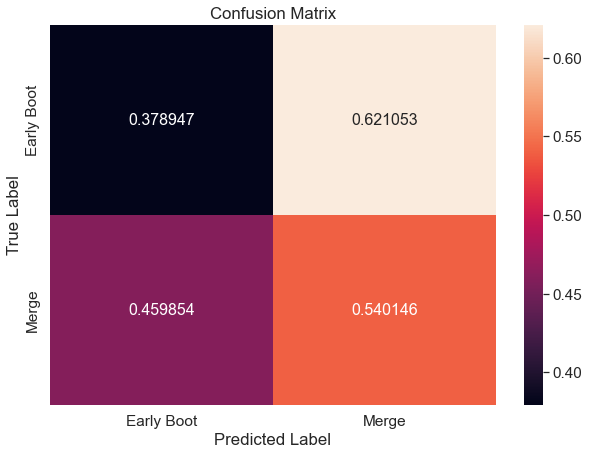

In [45]:
# create a confusion matrix comparing test set 
cf_matrix = confusion_matrix(y_test, best_logit_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Early Boot", 1: "Merge"})
df_cm.index = ["Early Boot", "Merge"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()